In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
df = load_iris()

In [ ]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X=df.data

In [ ]:
y=df.target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm= confusion_matrix(y_test,pred)
cm

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]])

In [ ]:
import seaborn as sns

<Axes: >

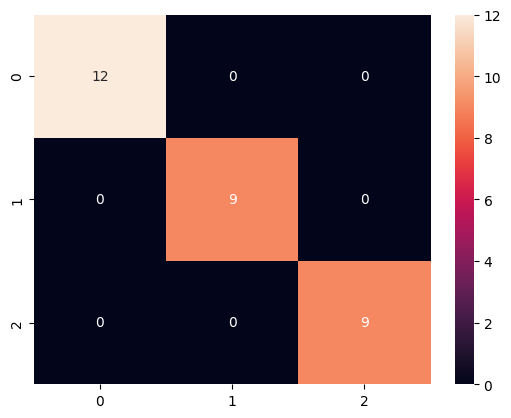

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from sklearn.datasets import load_iris
df = load_iris()

In [ ]:
df = pd.DataFrame(df.data ,columns = df.feature_names)

In [ ]:
df.drop(["sepal length (cm)","sepal width (cm)"],inplace =True,axis=1)



In [ ]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
mx= MinMaxScaler()
mx.fit(df[["petal length (cm)"]])
df["petal length (cm)"] = mx.transform(df[["petal length (cm)"]])

In [ ]:
mx.fit(df[["petal width (cm)"]])
df["petal width (cm)"] = mx.transform(df[["petal width (cm)"]])

In [ ]:
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


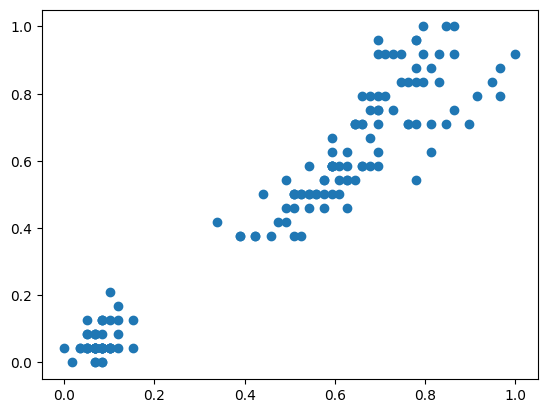

In [ ]:
plt.scatter(df['petal length (cm)'],df["petal width (cm)"])

In [ ]:
sse=[]
for k in range(1,11):
  model = KMeans(n_clusters=k)
  model.fit(df[['petal length (cm)']],df[['petal width (cm)']])
  sse.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[13.33885090491238,
 1.9420778923288335,
 0.7042927675936684,
 0.361318905806122,
 0.24979074045707844,
 0.1698113568897826,
 0.12192083068998746,
 0.09858639175290909,
 0.07307218887147485,
 0.0607535987176726]

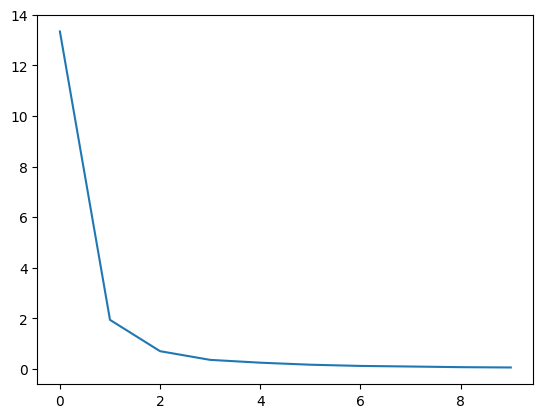

In [ ]:
plt.plot(sse)

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
df["predict"]= model.fit_predict(df[['petal length (cm)']],df[['petal width (cm)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df1 = df[df.predict == 0]
df2 = df[df.predict == 1]

Text(0, 0.5, 'petal width (cm)')

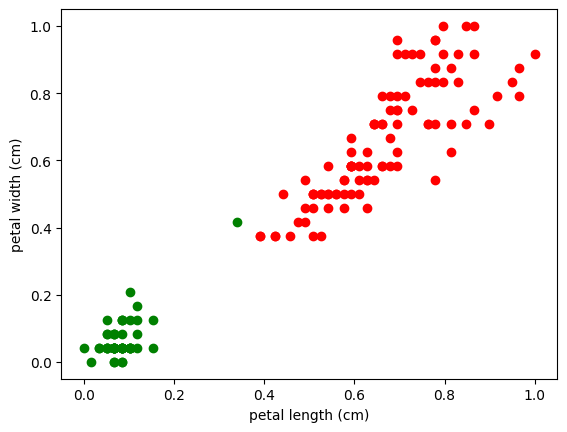

In [ ]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = "red")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = "green")
plt.xlabel("petal length (cm)")
plt.ylabel('petal width (cm)')

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [ ]:
df = load_wine()

In [ ]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
df1 = pd.DataFrame(df.data,columns=df.feature_names)

In [ ]:
df1["target"]=df.target

In [ ]:
df1.isna().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool

In [ ]:
X=df1.drop("target",axis=1)
y=df1.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
model.score(X_test,y_test)

0.8333333333333334

In [ ]:
model = BernoulliNB()

In [ ]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4444444444444444

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8611111111111112

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    "Linear_regression" : {
        "model": LinearRegression(),
        "params":{}
        },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],

        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.889274,{'n_estimators': 10}
2,Linear_regression,0.506557,{}
3,logistic_regression,0.922114,{'C': 1}
4,naive_bayes_gaussian,0.806928,{}
5,naive_bayes_multinomial,0.870350,{}
6,decision_tree,0.804700,{'criterion': 'entropy'}
